<a href="https://colab.research.google.com/github/Danemissias/AULA03/blob/master/Exercicio_7_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
# trocar pelo caminho do seu drive
caminho = '/content/drive/MyDrive/DNSE2017 (1).csv'

sinasc = pd.read_csv(caminho, dtype=str)

#transformacao dos dados
sinasc.PESO = pd.to_numeric(sinasc.PESO)
sinasc.IDADEMAE = pd.to_numeric(sinasc.IDADEMAE).astype(pd.Int64Dtype())
sinasc.IDADEPAI = pd.to_numeric(sinasc.IDADEPAI).astype(pd.Int64Dtype())
sinasc.QTDFILVIVO = pd.to_numeric(sinasc.QTDFILVIVO).astype(pd.Int64Dtype())
sinasc.QTDFILMORT = pd.to_numeric(sinasc.QTDFILMORT).astype(pd.Int64Dtype())
sinasc.APGAR1 = pd.to_numeric(sinasc.APGAR1).astype(pd.Int64Dtype())
sinasc.APGAR5 = pd.to_numeric(sinasc.APGAR5).astype(pd.Int64Dtype())
sinasc.SEMAGESTAC = pd.to_numeric(sinasc.SEMAGESTAC).astype(pd.Int64Dtype())
sinasc.CONSPRENAT = pd.to_numeric(sinasc.CONSPRENAT).astype(pd.Int64Dtype())
sinasc.SERIESCMAE = pd.to_numeric(sinasc.SERIESCMAE).astype(pd.Int64Dtype())
sinasc.QTDPARTCES = pd.to_numeric(sinasc.QTDPARTCES).astype(pd.Int64Dtype())
sinasc.QTDPARTNOR = pd.to_numeric(sinasc.QTDPARTNOR).astype(pd.Int64Dtype())
sinasc.QTDGESTANT = pd.to_numeric(sinasc.QTDGESTANT).astype(pd.Int64Dtype())


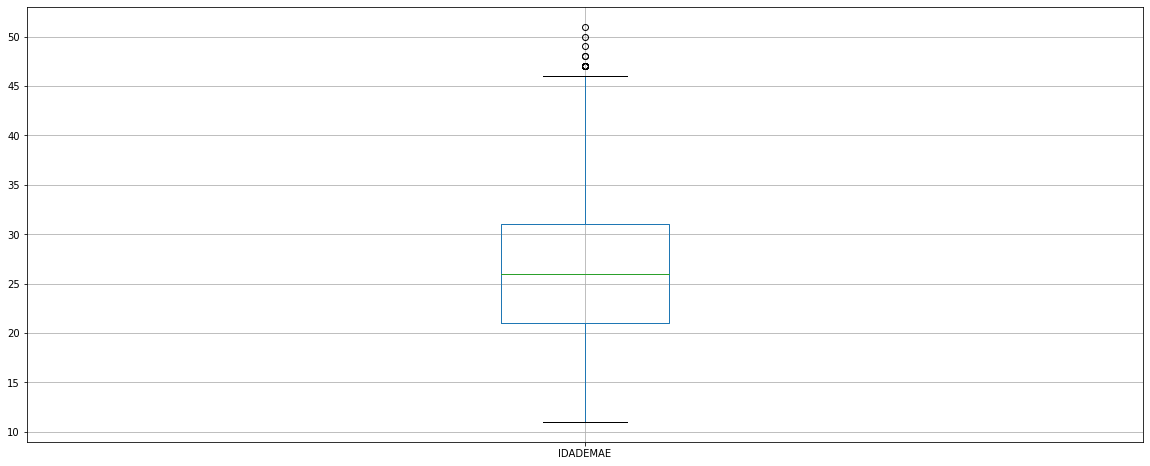

In [13]:

#EXERCICIO 1

#boxplot
#@title **Box-plot para idade da mãe** { vertical-output: true, form-width: "60%" }
bp = sinasc.boxplot(column=['IDADEMAE'], figsize=(20,8))



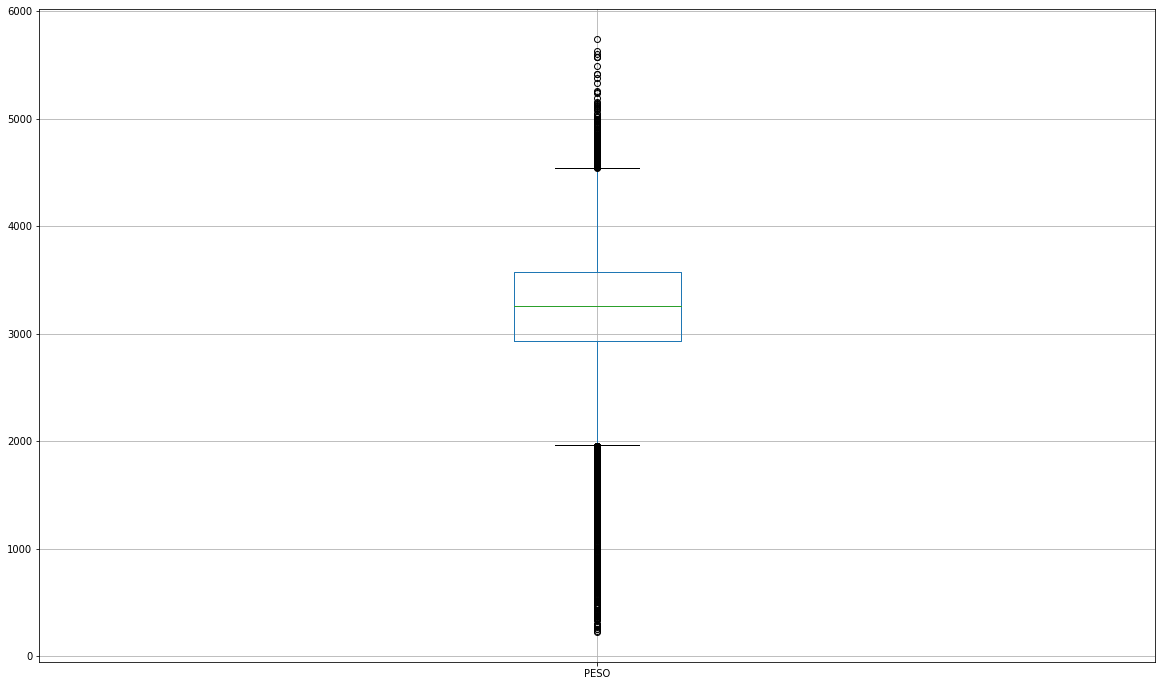

In [14]:
#EXERCICIO 2

#@title **Box-plot para o peso** { vertical-output: true, form-width: "60%" }
bp = sinasc.boxplot(column=['PESO'], figsize=(20,12))


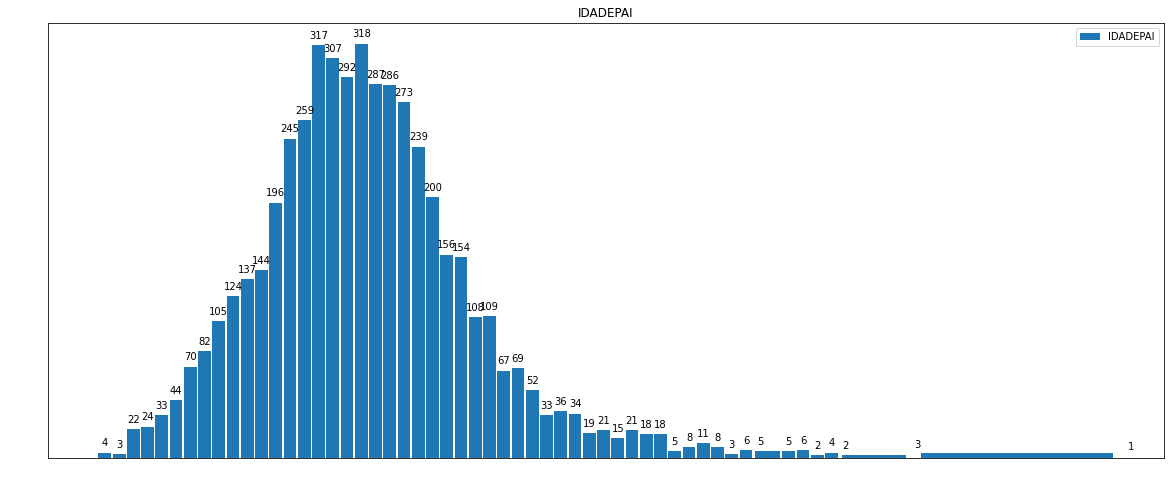

In [15]:
#EXERCICIO 3


bins_values = sinasc.IDADEPAI.value_counts(sort=False)
hist = sinasc.hist(
    column='IDADEPAI', bins=sorted(bins_values.keys()), grid=False, figsize=(20,8), rwidth=0.9, legend=True
)

hist[0][0].tick_params(colors='white')
hist[0][0].xaxis.label.set_color('white')
hist[0][0].yaxis.label.set_color('white')
r = hist[0][0].set_xlabel('Idade')
r = hist[0][0].set_ylabel('Fequência')
r = hist[0][0].set_ylabel('Fequência')

x_ticks = []
for key, value in bins_values.items():
  x_ticks.append(key)
  hist[0][0].text(key+0.5, value+5, int(value), ha='center')
t = hist[0][0].set_xticks(x_ticks)


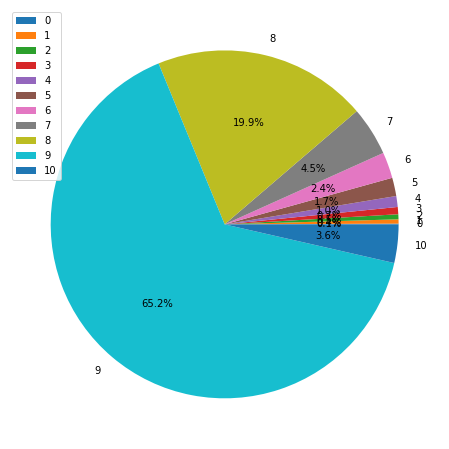

In [26]:
#EXERCICIO 4
#@title **Gráfico Pizza APGAR1** { vertical-output: true, form-width: "60%" }
sinascApgar1 = sinasc.groupby(by='APGAR1').count()
pizza = sinascApgar1[['contador']].plot(y='contador',  kind='pie', autopct='%1.1f%%', figsize=(20,8))
r = pizza.set(xlabel='', ylabel='')




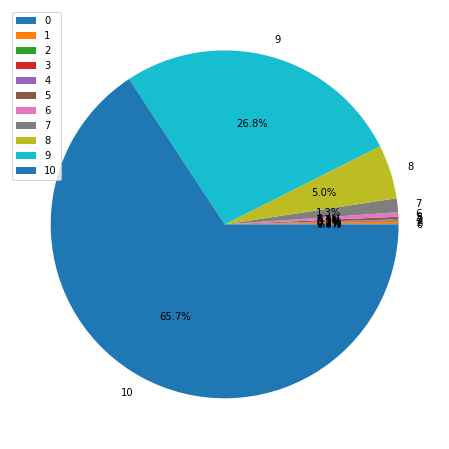

In [27]:

#@title **Gráfico Pizza APGAR5** { vertical-output: true, form-width: "60%" }
sinascApgar1 = sinasc.groupby(by='APGAR5').count()
pizza = sinascApgar1[['contador']].plot(y='contador',  kind='pie', autopct='%1.1f%%', figsize=(20,8))
r = pizza.set(xlabel='', ylabel='')

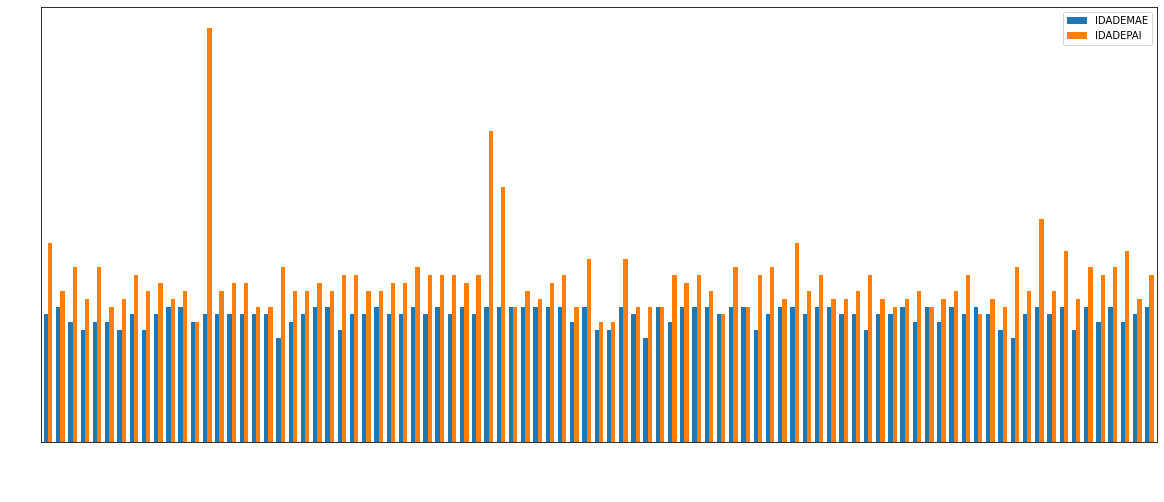

In [20]:
#EXERCICIO 5
#**Comparação ente Idade mãe e pai Mães menores que 18**

solteiras_menor18 = sinasc[(sinasc.IDADEMAE < 18) & (sinasc.ESTCIVMAE== '1') & (sinasc.IDADEPAI.notna())][['IDADEMAE', 'IDADEPAI']]
barras = solteiras_menor18.plot(kind='bar', width=0.7, figsize=(20,8))
barras.tick_params(colors='white')
barras.xaxis.label.set_color('white')
barras.yaxis.label.set_color('white')
r = barras.set(xlabel='Observação', ylabel='IDADEMAE')



In [37]:

aracaju = sinasc[sinasc.CODMUNRES == '2800308']
outras = sinasc[sinasc.CODMUNRES != '2800308']

In [ ]:
# gráfico de pizza de aracaju
grupo = aracaju.groupby(by='ESCMAE').count()
pizza = grupo[['contador']].plot(y='contador',  kind='pie', figsize=(10,4))
r = pizza.set(xlabel='', ylabel='')

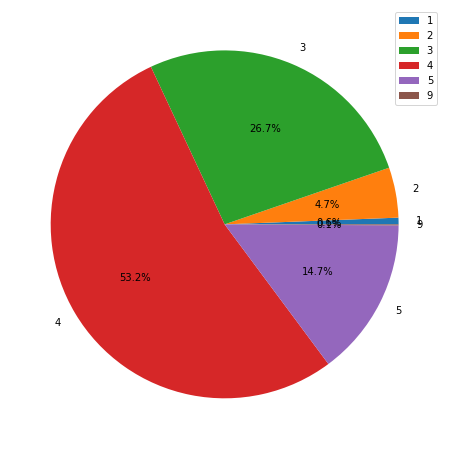

In [39]:
# gráfico de pizza das outras cidades
grupo = outras.groupby(by='ESCMAE').count()
pizza = grupo[['contador']].plot(y='contador',  kind='pie', autopct='%1.1f%%', figsize=(20,8))
r = pizza.set(xlabel='', ylabel='')